In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
warnings.filterwarnings("ignore")
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from keras.optimizers import Adam, SGD
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical

In [6]:
train = pd.read_csv("train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
test = pd.read_csv("test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
Y_train = train["label"]
X_train = train.drop(labels=["label"],axis=1)
# labellarım Ytrain oluyor geriye kalan pixellerde xtrain

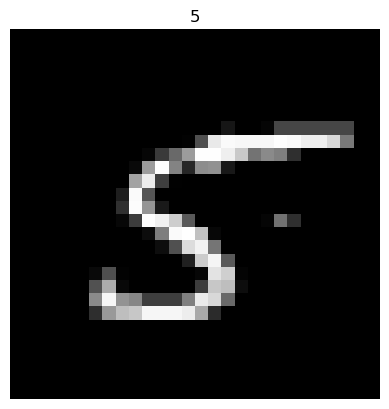

In [9]:
img = X_train.iloc[144].to_numpy().reshape(28,28)
plt.imshow(img,cmap="gray")
plt.title(train.iloc[144,0])
plt.axis("off")
plt.show()

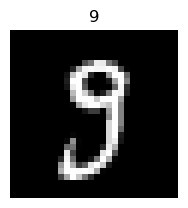

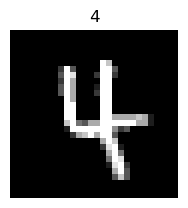

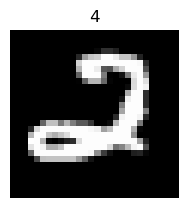

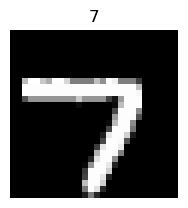

In [10]:
plt.subplot(2,2,1)
img = X_train.iloc[40].to_numpy().reshape(28,28)
plt.imshow(img,cmap="gray")
plt.title(train.iloc[40,0])
plt.axis("off")
plt.show()

plt.subplot(2,2,2)
img1 = X_train.iloc[950].to_numpy().reshape(28,28)
plt.imshow(img1,cmap="gray")
plt.title(train.iloc[950,0])
plt.axis("off")
plt.show()

plt.subplot(2,2,3)
img2 = X_train.iloc[1077].to_numpy().reshape(28,28)
plt.imshow(img2,cmap="gray")
plt.title(train.iloc[1040,0])
plt.axis("off")
plt.show()

plt.subplot(2,2,4)
img2 = X_train.iloc[2080].to_numpy().reshape(28,28)
plt.imshow(img2,cmap="gray")
plt.title(train.iloc[2080,0])
plt.axis("off")
plt.show()

<a id="2"></a>
## Normalizasyon, Yeniden Şekillendirme ve Etiket Kodlama
* Normalizasyon
    * Aydınlatmadaki farklılıkların etkisini azaltmak için gri tonlama normalizasyonu yapıyoruz.
    * Normalizasyon yaparsak, CNN daha hızlı çalışır.
* Yeniden Şekillendirme
    * Eğitim ve test görüntüleri (28 x 28)
    * Tüm verileri 28x28x1 3D matrislerine yeniden şekillendiriyoruz.
    * Keras 28x28x1 şeklinde çalışıyor , 1 anlamı grayscale , eğer 28x28 dersek keras bunu anlamaz 
    * Keras, kanallara karşılık gelen son bir boyuta ihtiyaç duyar. Görüntülerimiz gri tonlamalı olduğu için sadece bir kanal kullanılır.
* Etiket Kodlama  
    * Etiketleri one hot vektörlerine kodlayın
        * 2 => [0,0,1,0,0,0,0,0,0,0]
        * 4 => [0,0,0,0,1,0,0,0,0,0]


In [11]:
X_train = X_train / 255.0
test = test / 255.0


print("X_train shape : ",X_train.shape)
print("Test shape : ",test.shape)

X_train shape :  (42000, 784)
Test shape :  (28000, 784)


In [12]:
# Reshape
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)


print("X_train shape : ",X_train.shape)
print("Test shape : ",test.shape)

X_train shape :  (42000, 28, 28, 1)
Test shape :  (28000, 28, 28, 1)


In [13]:
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(Y_train,num_classes=10)

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val = train_test_split(X_train,Y_train,test_size=0.1,random_state=42)

print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


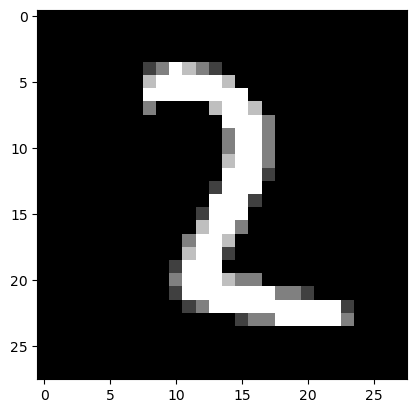

In [15]:
# Bazı örnekler
plt.imshow(X_train[2231][:,:,0],cmap="gray")
plt.show()

In [16]:
def model(optimizer="adam"):
    model=Sequential()
    model.add(Conv2D(filters=30,kernel_size=(5,5),padding="Same",activation="relu",input_shape=(28,28,1)))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    lr
    model.add(Conv2D(filters=25, kernel_size=(3, 3), padding="Same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(256, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation="softmax"))

    
    # Farklı optimizasyon yöntemleri için seçim yapma
    if optimizer=="adam":
        optimizer = Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999)
    elif optimizer=="sgd":
        optimizer = SGD(learning_rate=0.01,momentum=0.9,nesterov=True)
    model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
    return model

In [17]:
# Modeli KerasClassifier ile sklearn uyumlu hale getirme
# burası olmazsa cv ile keras uyumlu çalışmaz
model_sklearn = KerasClassifier(build_fn=model, verbose=1)

# GridSearchCV parametre arama alanı
parametre = {
    'batch_size': [32, 64, 128],
    'epochs': [10, 20, 30],
    'optimizer': ['adam', 'sgd']
}

# GridSearchCV'yi çalıştırma
grid = GridSearchCV(estimator=model_sklearn, param_grid=parametre, cv=3)
grid_result = grid.fit(X_train, Y_train)

# En iyi parametreler
print(f"Best parameters: {grid_result.best_params_}")

# En iyi sonuç
print(f"Best score: {grid_result.best_score_}")

# En iyi modelin eğitildiği parametreler
best_model = grid_result.best_estimator_

# Model Summary - GridSearch sonrası
best_model.model.summary()

ValueError: 
All the 54 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
54 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\gokay\anaconda3\envs\asd\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gokay\anaconda3\envs\asd\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\gokay\anaconda3\envs\asd\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\gokay\AppData\Local\Temp\ipykernel_20660\2013543491.py", line 7, in model
    lr
NameError: name 'lr' is not defined


In [ ]:
# 2 kere CV yapmamın sebebi , en iyi değerleri bulduktan sonra tekrar yapmak
# normalde buna aslında gerek yok ama iyice görmek için yapıyorum 

# Modeli KerasClassifier ile sklearn uyumlu hale getirme
model_sklearn = KerasClassifier(build_fn=model, verbose=1)

# GridSearchCV parametre arama alanı
parametre = {
    'batch_size': [64],
    'epochs': [30],
    'optimizer': ['sgd']
}

# GridSearchCV'yi çalıştırma
grid = GridSearchCV(estimator=model_sklearn, param_grid=parametre, cv=3)
grid_result = grid.fit(X_train, Y_train)

# En iyi parametreler
print(f"Best parameters: {grid_result.best_params_}")

# En iyi sonuç
print(f"Best score: {grid_result.best_score_}")

# En iyi modelin eğitildiği parametreler
best_model = grid_result.best_estimator_

# Model Summary - GridSearch sonrası
best_model.model.summary()

In [ ]:
# Veri artırma işlemi
datagen = ImageDataGenerator(
        featurewise_center=False,  # veri seti üzerinde giriş ortalamasını 0'a ayarla
        samplewise_center=False,  # her örneğin ortalamasını 0'a ayarla
        featurewise_std_normalization=False,  # veri setinin std ile girişleri böl
        samplewise_std_normalization=False,  # her bir girişi kendi std ile böl
        zca_whitening=False,  # boyut azaltma işlemi
        rotation_range=5,  # görüntüleri rastgele 5 derece döndür
        zoom_range = 0.1, # rastgele görüntüleri %5 zoomla
        width_shift_range=0.1,  # görüntüleri yatayda rastgele %5 kaydır
        height_shift_range=0.1,  # görüntüleri dikeyde rastgele %5 kaydır
        horizontal_flip=False,  # görüntüleri yatayda rastgele çevir
        vertical_flip=False)  # görüntüleri dikeyde rastgele çevirme

datagen.fit(X_train)


In [ ]:
epochs = 20  # Sonuçların daha iyi olması için epoch sayısını artırın
batch_size = 250
history = create_model().fit_generator(datagen.flow(X_train,Y_train,batch_size=batch_size),
                             epochs=epochs,validation_data =(X_val,Y_val),steps_per_epoch=X_train.shape[0]// batch_size)

In [ ]:
score = best_model.model.evaluate(X_val, Y_val, verbose=0)
print("Validation Loss: ", score[0])
print("Validation Accuracy: ", score[1])


In [ ]:
import h5py

save = history.save_weights("save.h5")

In [ ]:
plt.plot(history.history["val_loss"],color="b",label="validation loss")
plt.plot(history.history["loss"],color="r",label="Train loss")
plt.title("Loss Değerleri")
plt.xlabel("Epochs Sayısı")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
plt.plot(history.history["val_accuracy"],color="b",label="Validation acc")
plt.plot(history.history["accuracy"],color="r",label="Train acc")
plt.title("ACC Değerleri")
plt.xlabel("Epochs Sayısı")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
# Test verisetiyle tahmin
index = random.randint(0, test.shape[0] - 1)  # Tahmin yapmak istediğiniz rastgele bir indeks
resim = test[index]  # Test setinden bir örnek

#  Modelle tahmin yapın
resimboyut = resim.reshape(-1, 28, 28, 1)  # Modelin girdi formatına uygun hale getirin
tahmin = best_model.model.predict(resimboyut)
sınıf_tahmin = np.argmax(tahmin)  # En yüksek olasılığa sahip sınıfı alma

#  Tahmini yazdırın
print(f"Tahmin Edilen Sınıf: {sınıf_tahmin}")

#  Görüntüyü görselleştirin
plt.imshow(resim[:, :, 0], cmap="gray")  # Görüntüyü 28x28 formatında gösterme
plt.title(f"Tahmin: {sınıf_tahmin}")
plt.axis("off")
plt.show()


In [ ]:
#  X_val'dan bir örnek seçin ile tahmin
index = random.randint(0, X_val.shape[0] - 1) 
resim = X_val[index]  # X_val içindeki bir örnek


resimboyut = resim.reshape(-1, 28, 28, 1)  # Modelin girdi formatına uygun hale getirin
tahmin = best_model.model.predict(resimboyut)
sınıf = np.argmax(tahmin)  # En yüksek olasılığa sahip sınıfı alma

#  Orijinal etiketle karşılaştıma
gerçek = np.argmax(Y_val[index])  # Y_val içindeki  etiket

#  Sonuçları yazdırın
print(f"Tahmin Edilen Sınıf: {sınıf}")
print(f"Gerçek Sınıf: {gerçek}")

#  Görüntüyü görselleştirin
plt.imshow(resim[:, :, 0], cmap="gray")  
plt.title(f"Tahmin: {sınıf}, Gerçek: {gerçek}")
plt.axis("off")
plt.show()


In [ ]:
# Karışıklık matrisi (Confusion Matrix)
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Doğrulama veri setinden değerleri tahmin et
Y_pred = best_model.model.predict(X_val)

# Tahmin sınıflarını one hot vektörlerine dönüştür
Y_pred_classes = np.argmax(Y_pred, axis=1)

# Doğrulama gözlemlerini one hot vektörlerine dönüştür
Y_true = np.argmax(Y_val, axis=1)

# Karışıklık matrisini hesapla
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# Karışıklık matrisini çiz
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, cmap="Greens", linecolor="gray", fmt='.1f', ax=ax)
plt.xlabel("Tahmin Edilen Etiket")
plt.ylabel("Gerçek Etiket")
plt.title("Karışıklık Matrisi")
plt.show()


## 1. Sigmoid
Sigmoid fonksiyonu, çıkış değeri olarak 0 ile 1 arasında bir değer üretir.
Avantajları:

Çıktıları, sınıflandırma görevlerinde olasılık olarak yorumlanabilir.
İyi bir sınıflandırma sınırı sağlar.
Dezavantajları:

Vanishing Gradient (Kaybolan Gradyan): Sigmoid, özellikle çok derin ağlarda, gradyanların çok küçük olmasına neden olabilir. Bu da öğrenme sürecini zorlaştırır.
Çıktı değeri çok küçük (0'a yakın) olduğunda, ağın öğrenmesi çok yavaşlar.

Ne zaman kullanılır:

Binary sınıflandırma problemlerinde (örneğin, evet/hayır, 0/1) çıkış katmanında kullanılır.

## 2. Tanh (Hiperbolik Tangent)
Tanh fonksiyonu, çıkış değeri olarak -1 ile 1 arasında bir değer üretir.

Özellikler:

Çıktısı -1 ile 1 arasında sınırlıdır.
Çoğunlukla sıfır merkezli olduğu için, ağın öğrenmesi daha verimli olabilir.
Sigmoid'e benzer ancak daha geniş bir aralıkta çalışır.
Avantajları:

Sıfır merkezli olması, öğrenme sürecinde daha hızlı bir hız sağlar (negatif girişler daha hızlı öğrenilebilir).
Aktivasyonlar daha geniş bir aralığa sahiptir, bu da ağın daha güçlü bir temsil gücü sağlar.
Dezavantajları:

Vanishing Gradient: Sigmoid gibi, Tanh fonksiyonu da çok küçük gradyanlar üretebilir, bu da özellikle derin ağlarda öğrenmenin zorlaşmasına neden olabilir.
Çıkışın 1 veya -1’e çok yakın olması, ağın öğrenmesini yavaşlatabilir.
Ne zaman kullanılır:

Gizli katmanlarda genellikle kullanılır, çünkü sıfır merkezli olması öğrenme sürecini iyileştirir.


## 3. ReLU (Rectified Linear Unit)
ReLU, günümüzde en popüler aktivasyon fonksiyonlarından biridir.

Özellikler:

Pozitif girişler için doğrusal, negatif girişler için sıfır olan bir fonksiyondur.
Çok basit ve hesaplama açısından verimlidir.
Avantajları:

Vanishing Gradient Sorununa karşı daha dayanıklıdır, çünkü negatif değerler dışında gradyanlar kaybolmaz.
Hesaplama açısından hızlıdır ve eğitimde daha verimli sonuçlar verir.
Derin ağlarda oldukça iyi performans gösterir.
Dezavantajları:

Dead Neurons (Ölü Nöronlar): ReLU, negatif değerler için sıfır döndürdüğü için, bazı nöronlar "ölü" hale gelebilir ve ağırlıkları güncellenmeyebilir. Bu, özellikle yüksek öğrenme oranları kullanıldığında meydana gelebilir.
Ne zaman kullanılır:

Gizli katmanlarda genellikle ReLU kullanılır, özellikle derin ağlar için.
Bu, öğrenme sürecini hızlandıran ve performansı artıran bir fonksiyondur.


## 4. Leaky ReLU
Leaky ReLU, ReLU’nun modifiye edilmiş bir versiyonudur.

Özellikler:

Negatif değerler için küçük bir eğim sağlar (
𝛼
α negatif bölgeyi yumuşatır).
Bu, ReLU’nun ölü nöron sorununu çözmeye yardımcı olabilir.
Avantajları:

ReLU'nun ölü nöron problemini çözer.
Eğitimde daha stabil sonuçlar verebilir.
Dezavantajları:

Negatif değerler için küçük eğim hala var, ancak bu durumun tam anlamıyla ReLU kadar etkili olup olmadığı tartışmalıdır.
Ne zaman kullanılır:

Derin ağlarda, ReLU'nun ölü nöron sorunu yaşandığında Leaky ReLU tercih edilebilir.


## 5. Softmax
Softmax, genellikle sınıflandırma problemlerinde kullanılır ve çok sınıflı (multiclass) sınıflandırmalarda tercih edilir. Çıktıları, her sınıfın olasılıklarını verir ve bu olasılıkların toplamı 1 olur.

Özellikler:

Çoklu sınıflar için olasılıkları normalize eder.
Çıkışlar arasındaki ilişkiyi yakalayarak her bir sınıfın olasılığını tahmin eder.
Avantajları:

Çok sınıflı sınıflandırma problemleri için uygundur.
Çıktıların olasılık gibi yorumlanabilmesi, sınıflandırma kararlarını netleştirir.
Dezavantajları:

Yalnızca son katmanda kullanılır, çünkü her sınıfın olasılığı gereklidir.
Ne zaman kullanılır:

Çok sınıflı sınıflandırma problemlerinde (örneğin, bir resmin hangi kategoriye ait olduğunu belirlemek) kullanılır.



## Özet
Sigmoid: İkili sınıflandırma için, ancak derin ağlarda kaybolan gradyan sorununa yol açabilir.
Tanh: Sıfır merkezli, ancak yine de kaybolan gradyan sorunu olabilir. Gizli katmanlarda kullanımı yaygındır.
ReLU: Derin ağlar için en popüler seçimdir. Hesaplama açısından hızlıdır ve kaybolan gradyan sorununa karşı dayanıklıdır.
Leaky ReLU: ReLU'nun ölü nöron sorununu aşmak için kullanılır.
Softmax: Çoklu sınıf sınıflandırma problemleri için son katmanda kullanılır.